# 1.1 Example: Polynomial Curve Fitting

Polynomial regression of synthetic data (sine wave + Gaussian noise).

Data obtained from figure 1.2 of PRML scanned using [PlotDigitizer Online App](https://plotdigitizer.com/app)

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Load data

In [2]:
data = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')

In [3]:
data = data.astype(np.float64)

In [4]:
x = data[:, 0]
t = data[:, 1]

In [5]:
# for plotting the sinusoid
x_grid = np.linspace(0, 1, 100)
t_grid = np.sin(2 * np.pi * x_grid)

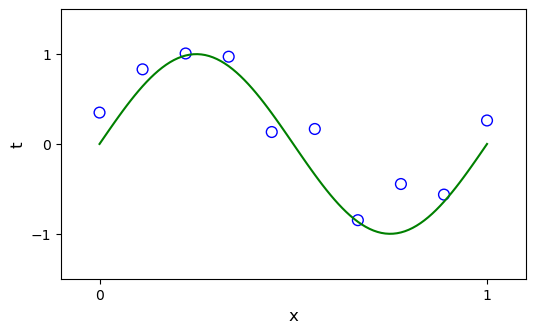

In [6]:
plt.figure(figsize=(6, 3.5))
plt.plot(x_grid, t_grid, 'g')  # ground truth sinusoid
plt.scatter(x, t, facecolors='none', edgecolors='b', s=60)
plt.xlim([-0.1, 1.1])
plt.ylim([-1.5, 1.5])
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[-1, 0, 1])
plt.xlabel('x', fontsize=12)
plt.ylabel('t', fontsize=12)
plt.show()

## Polynomial curve fitting

In [7]:
def poly_fit(x, t, x_grid, M):
    """
    Args:
        x (np.array, float64): inputs
        t (np.array, float64): target values
        x_grid (np.array, float64): input values for making predictions
        M (int): degree of the polynomial
    Returns:
        t_pred (np.array, float64): predicted values for x_grid
        
    """
    poly = PolynomialFeatures(degree=M, include_bias=True)
    X = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression(fit_intercept=False)
    model.fit(X, t)
    
    X_grid = poly.fit_transform(x_grid.reshape(-1, 1))
    t_pred = model.predict(X_grid)
    
    return t_pred

In [8]:
def plot_fit(x_grid, t_pred, M):
    plt.scatter(x, t, facecolors='none', edgecolors='b', s=60)
    plt.plot(x_grid, t_grid , 'g')
    plt.plot(x_grid, t_pred, 'r')
    plt.text(x=0.8, y=0.9, s=f'M = {M}', fontsize=14) 
    plt.xlim([-0.1, 1.1])
    plt.ylim([-1.4, 1.4])
    plt.xticks(ticks=[0, 1])
    plt.yticks(ticks=[-1, 0, 1])
    plt.xlabel('x', fontsize=12)
    plt.ylabel('t', fontsize=12)
    plt.show()

In [9]:
def plot_results(M=0):
    t_pred = poly_fit(x, t, x_grid, M)
    plot_fit(x_grid, t_pred, M)
    plt.show()

In [10]:
interact(
    plot_results,
    M = (0, 15, 1)
);

interactive(children=(IntSlider(value=0, description='M', max=15), Output()), _dom_classes=('widget-interact',…